In [1]:
import pandas as pd
import numpy as np

In [2]:
time=pd.read_csv('timeseries_users.csv')

In [3]:
event=pd.read_csv('timeseries_events.csv')

In [4]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
age        96 non-null int64
gender     96 non-null object
user_id    96 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.3+ KB


In [5]:
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30593 entries, 0 to 30592
Data columns (total 2 columns):
user_id       30593 non-null int64
event_date    30593 non-null object
dtypes: int64(1), object(1)
memory usage: 478.1+ KB


In [6]:
whole=pd.merge(event,time,'left','user_id')

In [7]:
import matplotlib 
import matplotlib.pyplot as plt
Sub=whole[(whole['gender']=='m')&(whole['age']>30.0)]

In [8]:
Sub2=Sub.groupby(['user_id']).count()

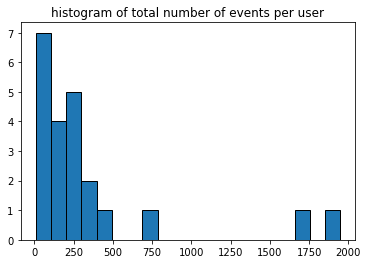

In [9]:
plt.figure()

plt.hist(Sub2['age'],bins=20,ec='black')
plt.title('histogram of total number of events per user')
plt.show()

In [10]:
event['time']=pd.to_datetime(event['event_date'])

In [11]:
def inter_event(time):
    inter=[]
    for i in range(1,len(time)):
        dif=time.iloc[i]-time.iloc[(i-1)]
        inter.append(dif)
    return inter
        

In [12]:
event['user_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], dtype=int64)

In [15]:
intervals=[]

for i in range(97):
    sub=event[event['user_id']==i]
    sub.sort_values('time')
    T=sub['time']
    I=inter_event(T)
    intervals.extend(I)   

In [16]:
inter_event_intervals=[abs(i.days) for i in intervals]

In [17]:
import matplotlib
import matplotlib.pyplot as plt

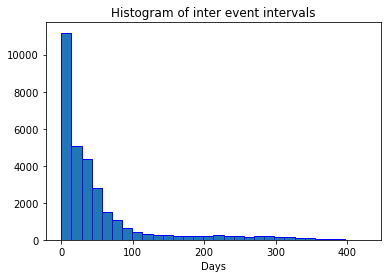

In [18]:
plt.figure()
plt.hist(inter_event_intervals,bins=30,ec='b')
plt.title('Histogram of inter event intervals')
plt.xlabel('Days')
plt.show()